In [74]:
import os
import pandas as pd 
import numpy as np 
from pandas import read_csv
from pandas import datetime
import math
from matplotlib import pyplot
%matplotlib inline

In [75]:
pwd

'C:\\Users\\TrinaNaskar\\Documents\\Daimler\\New Code\\CODES-Steel'

## Data Input

## Input and Transforms

In [78]:
series_x = read_csv('SteelMultivariateADS_2008.csv', parse_dates=[1], index_col=0)

In [79]:
series_x.head()

,Steel,Coal,Nickel,CrudeOil
Date,,,,
1-Jan-09,580,140.0,11407.62,43.75
1-Feb-09,580,150.0,10481.25,42.94
1-Mar-09,550,120.0,9791.36,46.58
1-Apr-09,500,120.0,11254.00,50.30
1-May-09,480,115.0,12716.05,57.20


## Plot the Data

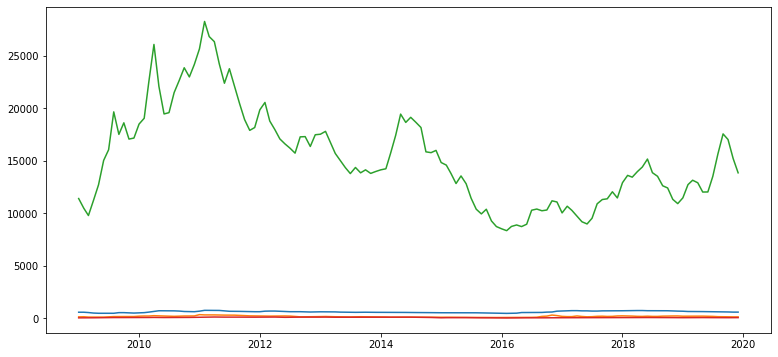

In [80]:
pyplot.figure(figsize = (13,6))
series_x = series_x.astype(str).astype(float)
series_x.index = pd.to_datetime(series_x.index)
pyplot.plot(series_x)
pyplot.show()

In [81]:
series_x.dtypes

Steel       float64
Coal        float64
Nickel      float64
CrudeOil    float64
dtype: object

## 2 Year Data Split

In [82]:
#creating the train and validation set
train_x = series_x[:108]
valid_x = series_x[108:]

In [83]:
len(valid_x)

24

## Build the Model

In [89]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train_x.astype(float))
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid_x))
    

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [93]:
#converting predictions to dataframe
cols = series_x.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,4):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [70]:
pred = pred.astype(str).astype(float)

In [91]:
pred.dtypes

Steel              object
Coking Coal        object
Nickel             object
Brent Crude oil    object
dtype: object

## MAPE Calculation

In [94]:
Steel = sum(abs((np.array(valid_x.iloc[:,[0]]) - np.array(pred.iloc[:,[0]])))/np.array(valid_x.iloc[:,[0]]))/24
print("Steel",Steel)
Coal = sum(abs((np.array(valid_x.iloc[:,[1]]) - np.array(pred.iloc[:,[1]])))/np.array(valid_x.iloc[:,[1]]))/24
print("Coal",Coal)
Nickel = sum(abs((np.array(valid_x.iloc[:,[2]]) - np.array(pred.iloc[:,[2]])))/np.array(valid_x.iloc[:,[2]]))/24
print("Nickel",Nickel)
CrudeOil = sum(abs((np.array(valid_x.iloc[:,[3]]) - np.array(pred.iloc[:,[3]])))/np.array(valid_x.iloc[:,[3]]))/24
print("Crude Oil",CrudeOil)

Steel [0.05981108650974337]
Coal [0.1822113690066067]
Nickel [0.197502913812589]
Crude Oil [0.07392639612943085]


## 1 Year Data Split

In [95]:
#creating the train and validation set
train_x = series_x[:120]
valid_x = series_x[120:]

In [96]:
len(valid_x)

12

## Build the Model

In [97]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train_x.astype(float))
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid_x))

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [98]:
#converting predictions to dataframe
cols = series_x.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,4):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [99]:
pred.dtypes

Steel       object
Coal        object
Nickel      object
CrudeOil    object
dtype: object

## MAPE Calculation

In [100]:
Steel = sum(abs((np.array(valid_x.iloc[:,[0]]) - np.array(pred.iloc[:,[0]])))/np.array(valid_x.iloc[:,[0]]))/24
print("Steel",Steel)
Coal = sum(abs((np.array(valid_x.iloc[:,[1]]) - np.array(pred.iloc[:,[1]])))/np.array(valid_x.iloc[:,[1]]))/24
print("Coal",Coal)
Nickel = sum(abs((np.array(valid_x.iloc[:,[2]]) - np.array(pred.iloc[:,[2]])))/np.array(valid_x.iloc[:,[2]]))/24
print("Nickel",Nickel)
CrudeOil = sum(abs((np.array(valid_x.iloc[:,[3]]) - np.array(pred.iloc[:,[3]])))/np.array(valid_x.iloc[:,[3]]))/24
print("Crude Oil",CrudeOil)

Steel [0.043543653086349395]
Coal [0.059061158317140185]
Nickel [0.09689298517272243]
Crude Oil [0.02665165634533684]
